In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.data import *
plt.style.use('plot.mplstyle')
%config InlineBackend.figure_format = 'retina'
from ase.io import read, write

In [3]:
test_atomistic = read("../bulk_modulus_data/atomistic.xyz", index=":")
test_cg = read("../bulk_modulus_data/coarse_grained.xyz", index=":")

In [4]:
# get the total cell energy
cell_energies = []
cell_volumes = []
all_local_energies = []
for struct in test_cg:
    zn_local_energies = struct.arrays['e_local_mofff'][struct.symbols == "Si"]
    all_local_energies.append(zn_local_energies)
    cell_energies.append(np.sum(zn_local_energies))
    cell_volumes.append(struct.get_volume())
    

In [5]:
all_local_energies = np.concatenate(all_local_energies)

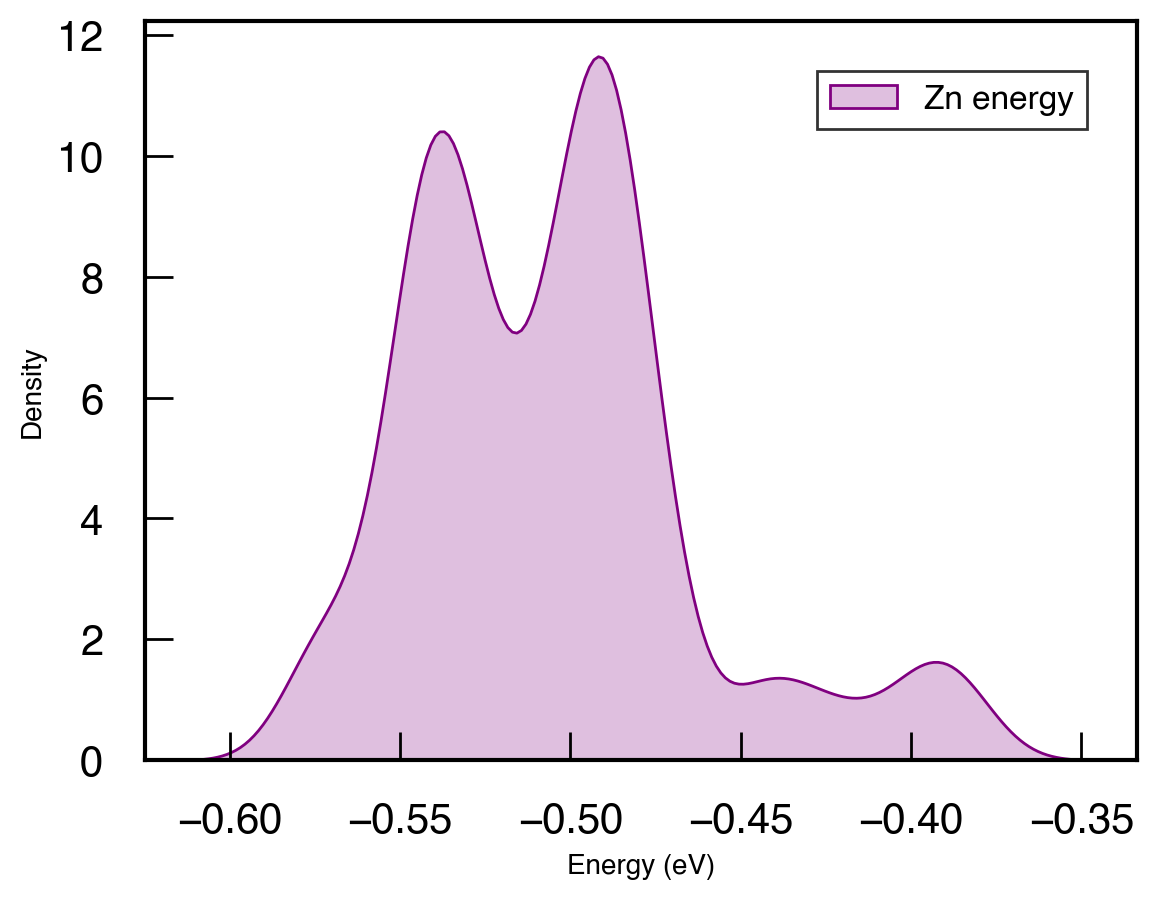

In [6]:
import seaborn as sns

sns.kdeplot(all_local_energies,fill=True,color='purple',label='Zn energy')
plt.xlabel("Energy (eV)")
plt.legend()

Text(0, 0.5, 'Total Zn$^{2+}$ energies (eV)')

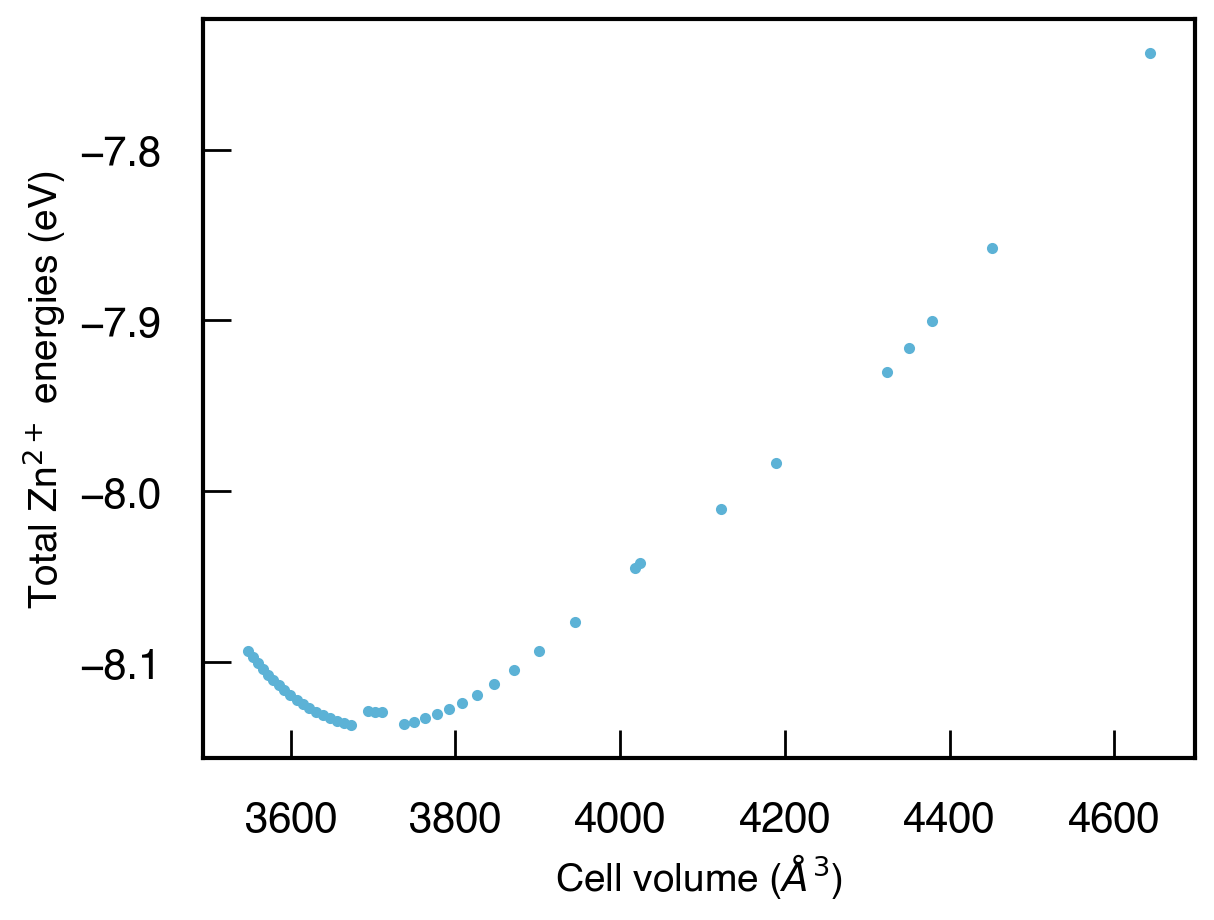

In [7]:
# plot total cell energy vs cell volume
fig,ax = plt.subplots()
ax.plot(cell_volumes,cell_energies,'o',linewidth=0,markersize=3,color='#5cb2d6')
ax.set_xlabel('Cell volume ($\AA^3$)',fontsize=14)
ax.set_ylabel('Total Zn$^{2+}$ energies (eV)',fontsize=14)


In [8]:
n_train = 32000
struct_type = ['atomistic','cg','A_cg']
atom_preds = [np.sum(i) for i in np.load(f"../results/bulk_modulus/atomistic_BM_preds_ntrain{n_train}.npy")]
cg_preds = [np.sum(i) for i in np.load(f"../results/bulk_modulus/cg_BM_preds_ntrain{n_train}.npy")]
A_cg_preds =  [np.sum(i) for i in np.load(f"../results/bulk_modulus/A_cg_BM_preds_ntrain{n_train}.npy")]

In [9]:
new_n_train = 20000
new_atom_preds = [np.sum(i) for i in np.load(f"../results/bulk_modulus/atomistic_BM_preds_ntrain{new_n_train}_H_new.npy")]
new_cg_preds =[np.sum(i) for i in np.load(f"../results/bulk_modulus/cg_BM_preds_ntrain{new_n_train}_H_new.npy")]
new_A_cg_preds = [np.sum(i) for i in np.load(f"../results/bulk_modulus/A_cg_BM_preds_ntrain{new_n_train}_H_new.npy")]

Text(0.5, 1.0, 'Old H dataset')

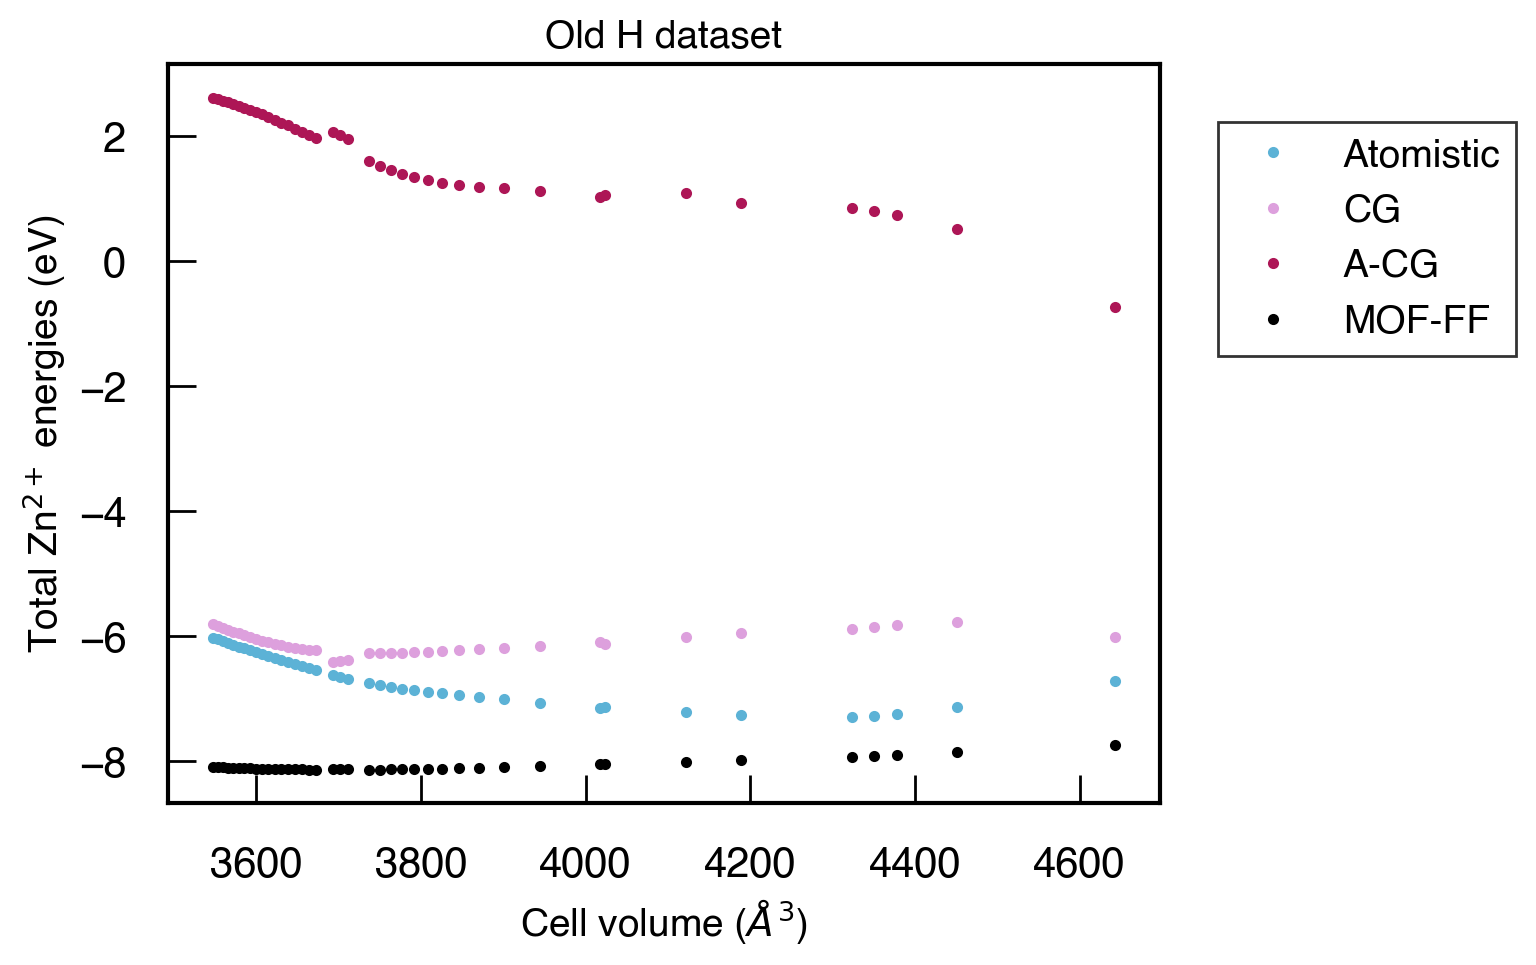

In [11]:
# plot total cell energy vs cell volume
fig,ax = plt.subplots()
ax.plot(cell_volumes,atom_preds,'o',linewidth=0,markersize=3,color='#5cb2d6',label='Atomistic')
ax.plot(cell_volumes,cg_preds,'o',linewidth=0,markersize=3,color='plum',label='CG')
ax.plot(cell_volumes,A_cg_preds,'o',linewidth=0,markersize=3,color='#AD1656',label='A-CG')
ax.plot(cell_volumes,cell_energies,'o',linewidth=0,markersize=3,color='black',label='MOF-FF')
ax.set_xlabel('Cell volume ($\AA^3$)',fontsize=14)
ax.set_ylabel('Total Zn$^{2+}$ energies (eV)',fontsize=14)
plt.legend(fontsize=14,bbox_to_anchor=(1, 1))
plt.title('Old H dataset',fontsize=14)

Text(0.5, 1.0, 'New H dataset')

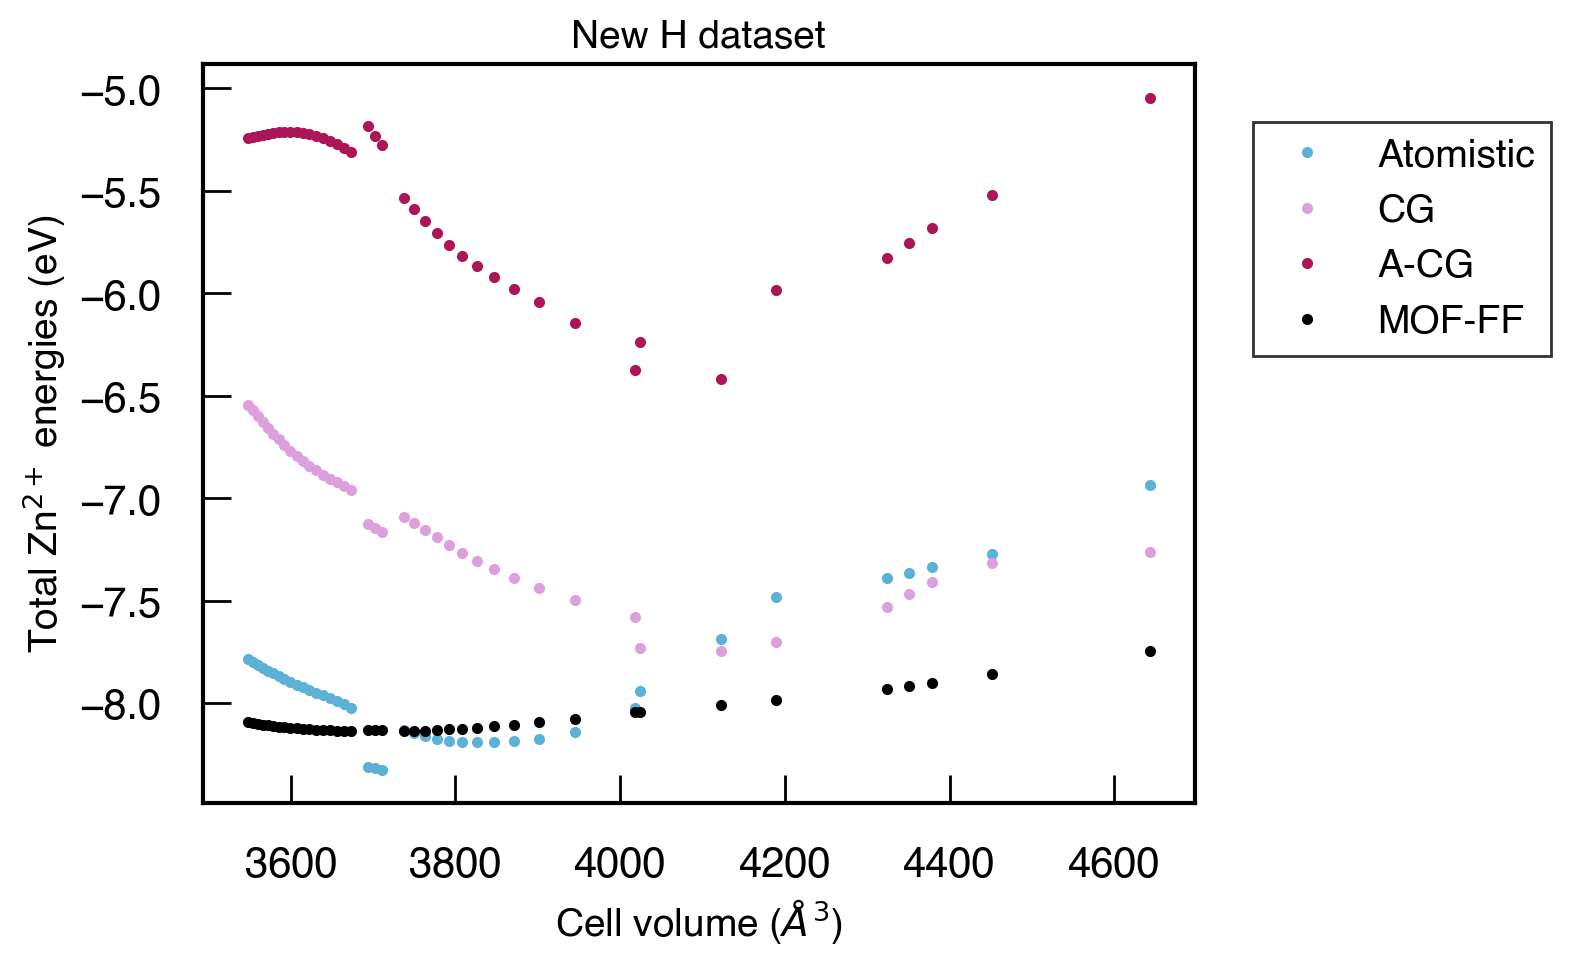

In [38]:
fig,ax = plt.subplots()
ax.plot(cell_volumes,new_atom_preds,'-o',linewidth=0,markersize=3,color='#5cb2d6',label='Atomistic')
ax.plot(cell_volumes,new_cg_preds,'o',linewidth=0,markersize=3,color='plum',label='CG')
ax.plot(cell_volumes,new_A_cg_preds,'o',linewidth=0,markersize=3,color='#AD1656',label='A-CG')
ax.plot(cell_volumes,cell_energies,'o',linewidth=0,markersize=3,color='black',label='MOF-FF')
ax.set_xlabel('Cell volume ($\AA^3$)',fontsize=14)
ax.set_ylabel('Total Zn$^{2+}$ energies (eV)',fontsize=14)
plt.legend(fontsize=14,bbox_to_anchor=(1,1))
plt.title('New H dataset',fontsize=14)
